In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import seaborn as sns

독거 노인이 아닌 사람들

In [9]:
all_not_elder = pd.read_csv("./data/지역별 독거노인이 아닌사람들.csv",index_col=0)
all_not_elder.head()

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
5,b'A310980901',b'A3109809',2010.0,1.0,1.0,1.0,80.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [24]:
diseasename = list(all_not_elder.iloc[:,-13:].columns)

전체 독거노인, 지역별 독거노인

In [10]:
years = [int("20" + str(x)) for x in range(10,22)]

In [11]:
all_al_edler = pd.read_csv("./data/전체독거노인.csv",index_col=0)
all_al_edler

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
33,b'A326339801',b'A3263398',2010.0,1.0,1.0,2.0,74.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
56,b'A338719801',b'A3387198',2010.0,1.0,1.0,2.0,75.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75,b'B309840901',b'B3098409',2010.0,2.0,1.0,2.0,65.0,2.0,1.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
76,b'B310600901',b'B3106009',2010.0,2.0,1.0,2.0,79.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
80,b'B311840901',b'B3118409',2010.0,2.0,1.0,2.0,75.0,3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35560,b'R901174501',b'R9011745',2021.0,8.0,2.0,2.0,80.0,3.0,2.0,4.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
35564,b'R901196601',b'R9011966',2021.0,8.0,2.0,2.0,80.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35571,b'R901558701',b'R9015587',2021.0,8.0,2.0,1.0,74.0,3.0,2.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35605,b'R903341101',b'R9033411',2021.0,8.0,2.0,1.0,71.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
meta = pd.read_excel("./data/modified_meta_data20.xlsx")
dict_region={}

for row in meta["option description"][3].split('|')[:-1]:
    dict_region[row.split(':')[1].strip()] = int(row.split(':')[0])
dict_region
for regi in list(dict_region.keys()):
    globals()["data_{}".format(regi)] = all_al_edler[all_al_edler["region"] == dict_region[regi]]

In [68]:
def sumdata(x):
    disease = []
    x = x.iloc[:,-13:]
    diseasename = list(x.columns)
    for i in x.columns:
        if 1 in x[i].value_counts().index:
            if len(x[i].value_counts()) == 3:
                disease.append(x[i].value_counts().values[2])
            else: disease.append(x[i].value_counts()[1])
        else: disease.append(0)
    df_disease = pd.DataFrame(np.array(disease).reshape(-1,13))
    df_disease.columns = diseasename
    return df_disease

In [69]:
sum_al = sumdata(all_not_elder)
sum_al_ratio = sum_al/len(all_not_elder)
sum_al_ratio.index = ["비고령"]
sum_al_ratio

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
비고령,0.348043,0.347692,0.158004,0.227338,0.149517,0.033726,0.093041,0.023547,0.032226,0.029386,0.016655,0.129128,0.045978


In [70]:
sum_al_elder=sumdata(all_al_edler)
sum_강원_elder=sumdata(data_강원)
sum_경기_elder=sumdata(data_경기)
sum_경남_elder=sumdata(data_경남)
sum_경북_elder=sumdata(data_경북)
sum_광주_elder=sumdata(data_광주)
sum_대구_elder=sumdata(data_대구)
sum_대전_elder=sumdata(data_대전)
sum_부산_elder=sumdata(data_부산)
sum_서울_elder=sumdata(data_서울)
sum_세종_elder=sumdata(data_세종)
sum_울산_elder=sumdata(data_울산)
sum_인천_elder=sumdata(data_인천)
sum_전남_elder=sumdata(data_전남)
sum_전북_elder=sumdata(data_전북)
sum_충남_elder=sumdata(data_충남)
sum_충북_elder=sumdata(data_충북)
sum_제주_elder=sumdata(data_제주)

df_sum=pd.concat([sum_al_elder,sum_강원_elder,sum_경기_elder,sum_경남_elder,sum_경북_elder,sum_광주_elder,
sum_대구_elder,sum_대전_elder,sum_부산_elder,sum_서울_elder,sum_세종_elder,sum_울산_elder,
sum_인천_elder,sum_전남_elder, sum_전북_elder, sum_충남_elder, sum_충북_elder,sum_제주_elder])
df_sum.index = ["전국", "강원", "경기", "경남", "경북", "광주", "대구", "대전", "부산", "서울", "세종", "울산",
                "인천", "전남", "전북", "충남", "충북", "제주"]


In [71]:
lst_pop = [sum(all_al_edler.groupby("region").count()["ID"].values)]+[len(data_강원),
len(data_경기),
len(data_경남),
len(data_경북),
len(data_광주),
len(data_대구),
len(data_대전),
len(data_부산),
len(data_서울),
len(data_세종),
len(data_울산),
len(data_인천),
len(data_전남),
len(data_전북),
len(data_충남),
len(data_충북),
len(data_제주)]

In [72]:
lst_pop

[2483,
 115,
 328,
 154,
 209,
 78,
 93,
 56,
 212,
 323,
 189,
 41,
 105,
 172,
 144,
 127,
 101,
 36]

In [73]:
sum_every_elder_ratio = (df_sum.T/lst_pop).T
sum_every_elder_ratio

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
전국,0.394281,0.660894,0.305679,0.346355,0.122433,0.025775,0.157068,0.063230,0.079742,0.057189,0.015707,0.095852,0.077729
강원,0.469565,0.695652,0.313043,0.295652,0.139130,0.026087,0.113043,0.060870,0.078261,0.060870,0.034783,0.069565,0.086957
경기,0.390244,0.652439,0.359756,0.448171,0.125000,0.027439,0.137195,0.051829,0.073171,0.048780,0.015244,0.036585,0.060976
경남,0.415584,0.629870,0.259740,0.298701,0.077922,0.045455,0.175325,0.084416,0.084416,0.051948,0.000000,0.058442,0.051948
경북,0.334928,0.712919,0.301435,0.339713,0.105263,0.028708,0.157895,0.052632,0.081340,0.033493,0.014354,0.105263,0.057416
광주,0.487179,0.602564,0.384615,0.320513,0.166667,0.012821,0.192308,0.051282,0.115385,0.089744,0.025641,0.153846,0.076923
대구,0.451613,0.645161,0.268817,0.344086,0.086022,0.010753,0.150538,0.021505,0.053763,0.021505,0.021505,0.107527,0.086022
대전,0.321429,0.678571,0.321429,0.410714,0.125000,0.000000,0.160714,0.107143,0.107143,0.071429,0.017857,0.053571,0.089286
부산,0.391509,0.632075,0.353774,0.358491,0.132075,0.051887,0.183962,0.070755,0.099057,0.061321,0.009434,0.051887,0.094340
서울,0.386997,0.653251,0.266254,0.399381,0.117647,0.021672,0.117647,0.061920,0.080495,0.052632,0.024768,0.068111,0.080495


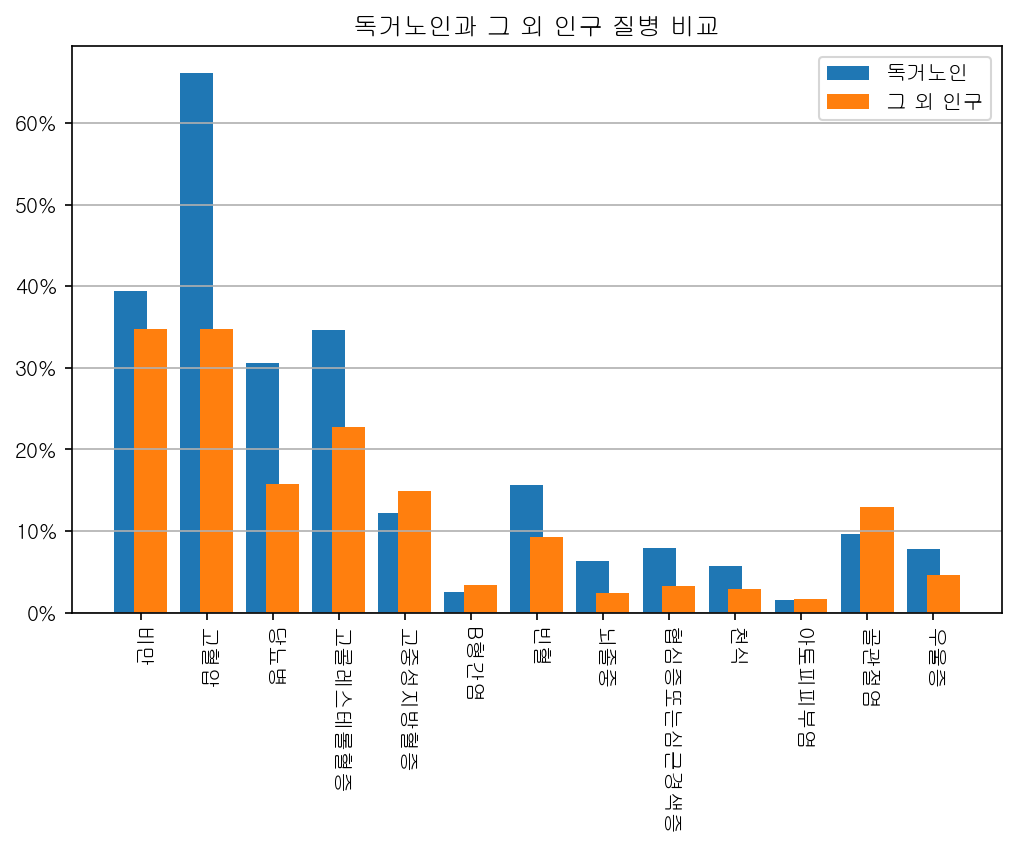

In [74]:
plt.figure(figsize=(8,5), dpi=150)
plt.bar(np.arange(13)-0.15, sum_every_elder_ratio.iloc[0,:].values ,width=0.5)
plt.bar(np.arange(13)+0.15, sum_al_ratio.values[0], width=0.5)
plt.xticks(np.arange(13), diseasename, rotation = 270)
plt.yticks(np.arange(0,sum_every_elder_ratio.iloc[0,:].values.max(),0.1), [ str(int(x*100))+"%" for x in (np.arange(0,sum_every_elder_ratio.iloc[0,:].values.max(),0.1))])
plt.title("독거노인과 그 외 인구 질병 비교")
plt.legend(["독거노인","그 외 인구"])
plt.grid(axis = "y")

In [33]:
np.arange(0,sum_every_elder_ratio.iloc[0,:].values.max(),0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

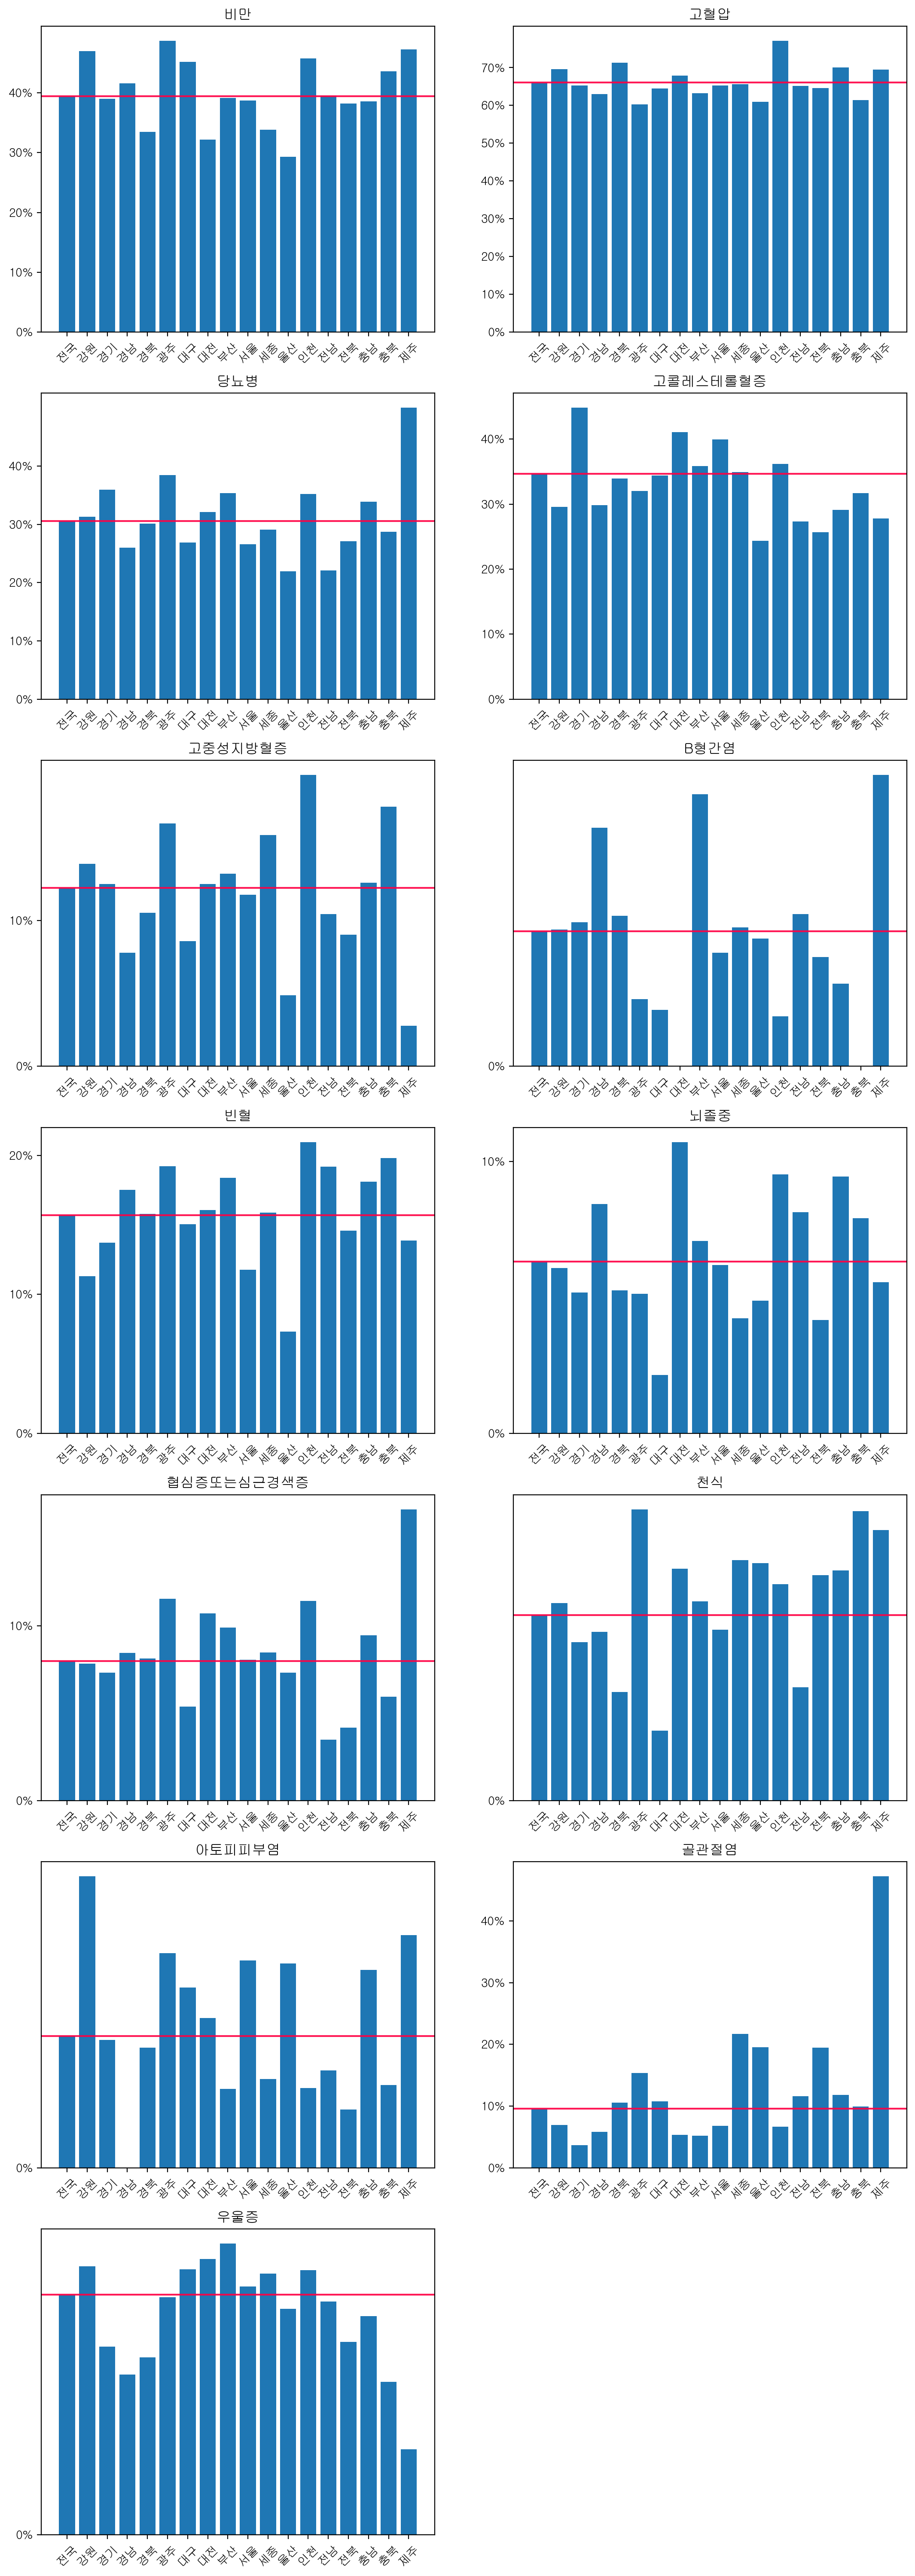

In [75]:
plt.figure(figsize=(13, 50), dpi=200)
for i, name in enumerate(diseasename):
    plt.subplot(9,2,i+1)
    plt.bar(df_sum.index, sum_every_elder_ratio[name])
    plt.title(diseasename[i])
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0,sum_every_elder_ratio[name].max(),0.1), [ str(int(x*100))+"%" for x in (np.arange(0,sum_every_elder_ratio[name].max(),0.1))])
    plt.axhline(sum_every_elder_ratio[name][0], color='#FF0044', linewidth=1.5, alpha=0.9)

In [76]:
gap_all_ragion = []
for i in range(17):
    gap_all_ragion.append(sum_every_elder_ratio.iloc[0,:] - sum_every_elder_ratio.iloc[i+1,:])
gap_all_ragion = pd.DataFrame(gap_all_ragion)
gap_all_ragion.index = sum_every_elder_ratio.index[1:]
gap_all_ragion.head(10)

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
강원,-0.075284,-0.034758,-0.007365,0.050703,-0.016698,-0.000312,0.044025,0.002360,0.001481,-0.003681,-0.019076,0.026287,-0.009228
경기,0.004037,0.008455,-0.054077,-0.101816,-0.002567,-0.001664,0.019873,0.011401,0.006572,0.008408,0.000463,0.059266,0.016753
경남,-0.021303,0.031024,0.045938,0.047654,0.044510,-0.019679,-0.018257,-0.021186,-0.004673,0.005241,0.015707,0.037410,0.025781
경북,0.059353,-0.052025,0.004243,0.006642,0.017169,-0.002933,-0.000827,0.010598,-0.001597,0.023696,0.001353,-0.009411,0.020312
광주,-0.092898,0.058330,-0.078937,0.025842,-0.044234,0.012955,-0.035240,0.011948,-0.035642,-0.032555,-0.009934,-0.057994,0.000805
대구,-0.057332,0.015733,0.036861,0.002269,0.036411,0.015023,0.006530,0.041725,0.025979,0.035684,-0.005799,-0.011675,-0.008293
대전,0.072853,-0.017677,-0.015750,-0.064359,-0.002567,0.025775,-0.003646,-0.043913,-0.027401,-0.014240,-0.002150,0.042280,-0.011557
부산,0.002772,0.028819,-0.048095,-0.012135,-0.009643,-0.026112,-0.026894,-0.007525,-0.019314,-0.004132,0.006273,0.043965,-0.016611
서울,0.007284,0.007643,0.039425,-0.053026,0.004785,0.004103,0.039421,0.001310,-0.000753,0.004557,-0.009061,0.027740,-0.002767
세종,0.055657,0.004809,0.014673,-0.002851,-0.036298,-0.000680,-0.001662,0.020902,-0.004914,-0.016885,0.005125,-0.121079,-0.006928


Text(0.5, 1.0, '지역별 질병 Heat Map')

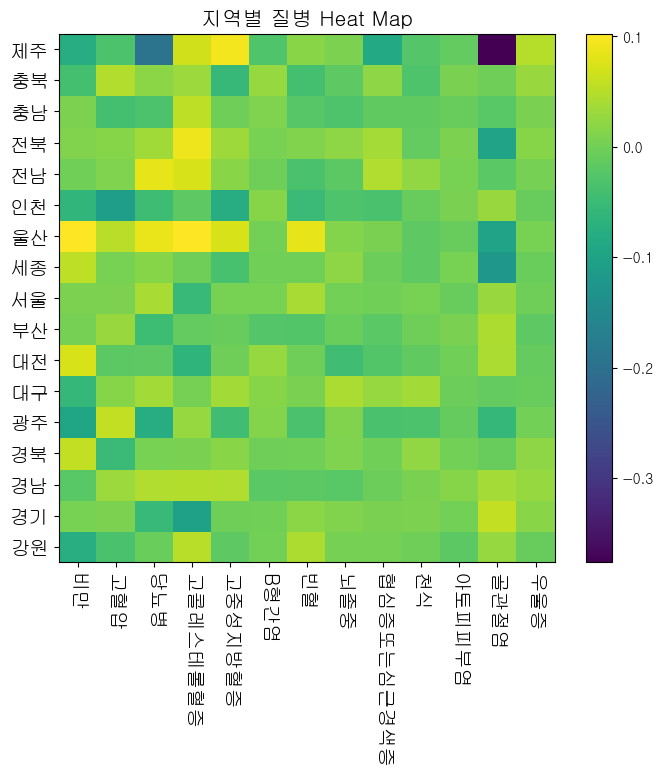

In [79]:
plt.figure(figsize=(8,7), dpi=100)
plt.pcolor(gap_all_ragion)
plt.yticks(np.arange(0.5 ,len(gap_all_ragion.index), 1),list(gap_all_ragion.index), fontsize=14)
plt.xticks(np.arange(0.5, len(gap_all_ragion.columns), 1),list(gap_all_ragion.columns), fontsize=14,rotation = 270)
plt.colorbar()
plt.title("지역별 질병 Heat Map", fontsize=15)

In [ ]:
lst_pop[1:], (np.array(lst_pop[1:])/sum(np.array(lst_pop[1:])))*100

([115,
  328,
  154,
  209,
  78,
  93,
  56,
  212,
  323,
  189,
  41,
  105,
  172,
  144,
  127,
  101,
  36],
 array([ 4.63149416, 13.20982682,  6.20217479,  8.41723721,  3.14136126,
         3.74546919,  2.25533629,  8.5380588 , 13.00845751,  7.61175997,
         1.65122835,  4.22875554,  6.92710431,  5.79943617,  5.11478051,
         4.06766009,  1.44985904]))